In [23]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
cg = CoinGeckoAPI()

In [4]:
coins = [ 'ETH', 'BNB', 'SOL', 'ADA', 'LUNA', 'AVAX', 'MATIC', 'ATOM', 'ALGO', 'NEAR', 'FTM', 'ONE' ]
coins = [x.lower() for x in coins]
df = pd.DataFrame(cg.get_coins_list())
#print(df.loc[df['symbol'].isin(coins)])
#print(df.loc[df['name'].isin(['Avalanche'])])
#print(df.loc[df['name'].isin(['Harmony'])])

In [7]:
coins = ['ethereum', 'cardano', 'solana']

## Get data

In [8]:
coin_by_id = {}
coin_market_chart_by_id = {}

for i in coins:
    coin_by_id[i] = cg.get_coin_by_id(i)
    coin_market_chart_by_id[i] = cg.get_coin_market_chart_by_id(id=i,vs_currency='usd',days='90')

## Summary

In [58]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [59]:
i = coins[0]
data = coin_by_id[i]
description = data['description']['en']
link = data['links']['homepage'][0]
summary = pd.DataFrame({"Coin": [i], "Description": [description], "Link": [link]})
summary

,Coin,Description,Link
0,ethereum,"Ethereum is a global, open-source platform for...",https://www.ethereum.org/


In [10]:
for i in coins:
    print('\033[1m' + i + '\033[0m')
    data = coin_by_id[i]
    text = data['description']['en']
    print(text.split('\r')[0])
    print('Link: '+ data['links']['homepage'][0])
    print()

ethereum
Ethereum is a global, open-source platform for decentralized applications. In other words, the vision is to create a world computer that anyone can build applications in a decentralized manner; while all states and data are distributed and publicly accessible. Ethereum supports smart contracts in which developers can write code in order to program digital value. Examples of decentralized apps (dapps) that are built on Ethereum includes tokens, non-fungible tokens, decentralized finance apps, lending protocol, decentralized exchanges, and much more.
Link: https://www.ethereum.org/

cardano

Link: https://www.cardano.org/en/home/

solana

Link: https://solana.com/



## Price Data

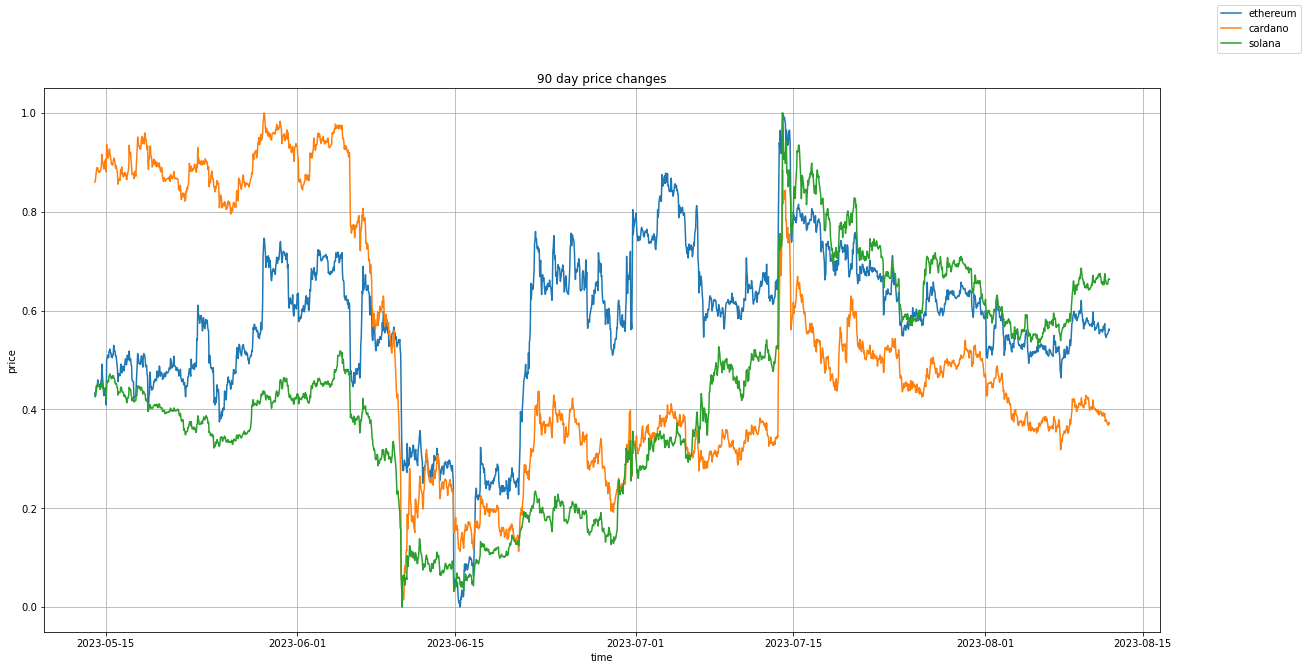

In [19]:
price_data = pd.DataFrame(columns=['time'])

for i in coins:
    df = coin_market_chart_by_id[i]
    df = pd.DataFrame(df['prices'], columns=['time', i])
    df['time'] = pd.to_datetime(df['time'], unit='ms')
    df['time'] = df['time'].round('H')
    price_data = pd.merge(price_data, df, on='time', how='outer')

price_data = price_data.sort_values(by=['time'])
scaler = MinMaxScaler()
price_data[coins] = scaler.fit_transform(price_data[coins])

fig, ax = plt.subplots(figsize=(20,10))

for i in coins:   
    ax.plot(price_data['time'], price_data[i], label=i)

plt.title('90 day price changes')
ax.set_xlabel('time')
ax.set_ylabel('price')
fig.legend(loc="upper right")
plt.grid(True)
plt.show()

### Price correlation matrix

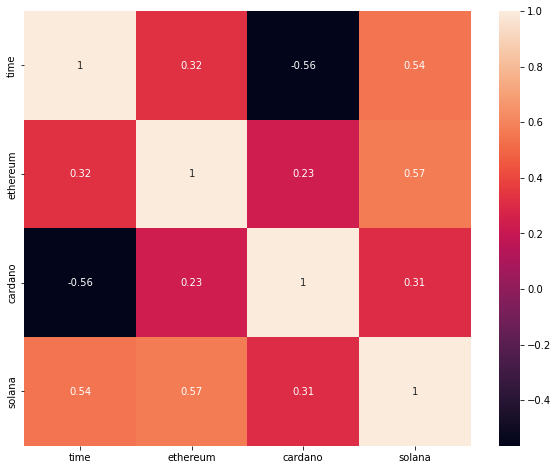

In [8]:
heat = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(heat, annot=True)
plt.show()

## Volume Data

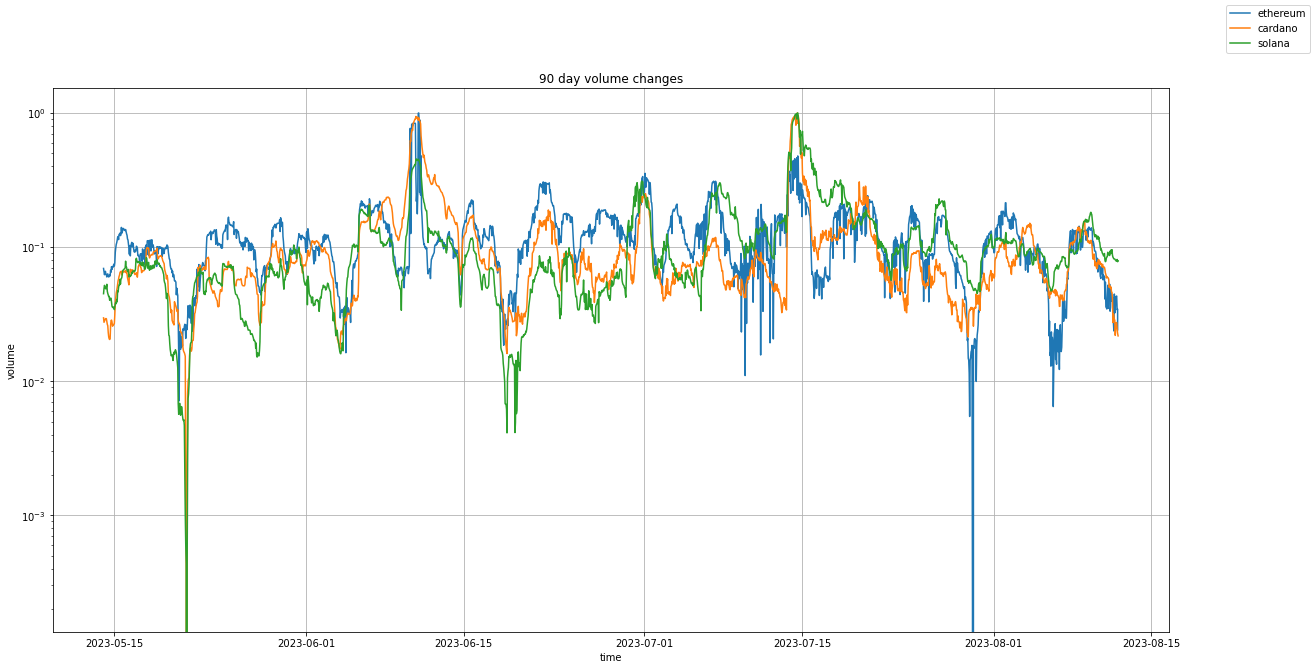

In [20]:
volume_data = pd.DataFrame(columns=['time'])

for i in coins:
    df = coin_market_chart_by_id[i]
    df = pd.DataFrame(df['total_volumes'], columns=['time', i])
    df['time'] = pd.to_datetime(df['time'], unit='ms')
    df['time'] = df['time'].round('H')
    volume_data = pd.merge(volume_data, df, on='time', how='outer')

volume_data = volume_data.sort_values(by=['time'])
scaler = MinMaxScaler()
volume_data[coins] = scaler.fit_transform(volume_data[coins])

fig, ax = plt.subplots(figsize=(20,10))

for i in coins:
    ax.plot(volume_data['time'], volume_data[i], label=i)

plt.title('90 day volume changes')
ax.set_xlabel('time')
ax.set_ylabel('volume')
ax.set_yscale('log')
fig.legend(loc="upper right")
plt.grid(True)
plt.show()

### Volume correlation matrix

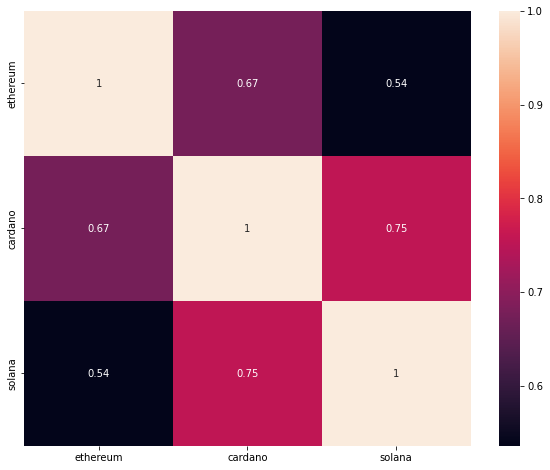

In [24]:
heat = volume_data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(heat, annot=True)
plt.show()

## Exchanges Data

In [37]:
def tm_sorter(column):
    """Sort function"""
    teams = ['Binance', 'Binance US', 'Bitstamp','Bitfinex','Bittrex','Coinbase Exchange','Crypto.com Exchange','FTX',
            'Gate.io', 'Gemini', 'Huobi Global', 'Huobi Korea', 'Kraken', 'KuCoin', 'OKEx', 'Poloniex', 'Uniswap (v3)',
            'Upbit']
    correspondence = {team: order for order, team in enumerate(teams)}
    return column.map(correspondence)

In [38]:
exchange_data = pd.DataFrame(columns=['exchange'])

for i in coins:
    df = coin_by_id[i]
    df = pd.DataFrame(df['tickers'])
    lst = []
    for j in range(df['market'].count()):
        lst.append(df['market'][j]['name'])
    
    df['exchange'] = lst
    df = df.groupby(['exchange']).size().to_frame(i + '_numOfPairs')
    exchange_data = pd.merge(exchange_data, df, on='exchange', how='outer')

exchange_data = exchange_data.sort_values(by='exchange', key=tm_sorter)
exchange_data.reset_index(drop=True, inplace=True)
exchange_data = exchange_data.head(20)
exchange_data

,exchange,ethereum_numOfPairs,cardano_numOfPairs,solana_numOfPairs
0,Binance,5.0,6.0,7.0
1,Binance US,1.0,1.0,1.0
2,Bitstamp,4.0,2.0,NaN
3,Bitfinex,1.0,3.0,NaN
4,Coinbase Exchange,5.0,4.0,5.0
5,Crypto.com Exchange,2.0,2.0,2.0
6,Gate.io,1.0,2.0,2.0
7,Gemini,1.0,NaN,1.0
8,Kraken,5.0,5.0,4.0
9,KuCoin,2.0,3.0,2.0


## Financial Data

In [48]:
k1 = ['current_price','market_cap','total_volume','high_24h','low_24h','ath','ath_change_percentage','ath_date','atl','atl_change_percentage','atl_date','total_value_locked']
k2 = k1 + ['price_change_24h','price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y','total_supply','max_supply','circulating_supply','mcap_to_tvl_ratio','fdv_to_tvl_ratio']
add_round = ['ath_change_percentage', 'atl', 'atl_change_percentage', 'price_change_24h','price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y', 'circulating_supply', 'fully_diluted_value']
add_seperator = ['market_cap','total_volume','high_24h','low_24h','ath','atl','price_change_24h','total_supply','max_supply','circulating_supply','fully_diluted_value']
add_percent = ['ath_change_percentage', 'atl_change_percentage', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']

financial_data = pd.DataFrame(columns=['metric'])

for i in coins:
    df = coin_by_id[i]
    df = df['market_data']
    for j in k1:
        r = df[j]
        if isinstance(r, dict):
            df[j] = r['usd']
        else:
            df[j] = r
    dic = {key: df[key] for key in k2}
    dic['nvt_ratio'] = dic['market_cap'] / dic['total_volume']
    dic['fully_diluted_value'] = dic['current_price'] * dic['total_supply'] if dic['total_supply'] is not None else 0
    dic['fdv_to_market_cap'] = dic['fully_diluted_value'] / dic['market_cap']
    for c in add_round:
        dic[c] = round(dic[c], 4)
    for c in add_seperator:
        try:
            dic[c] = format(dic[c],",")
        except:
            pass
    for c in add_percent:
        dic[c] = str(dic[c])+'%'
    df = pd.DataFrame(list(dic.items()), columns=['metric', i])
    financial_data = pd.merge(financial_data, df, on='metric', how='outer')

financial_data

,metric,ethereum,cardano,solana
0,current_price,1848.59,0.293119,24.62
1,market_cap,"222,003,320,766","10,269,043,770","9,987,715,095"
2,total_volume,"4,141,438,222","122,904,442","341,919,471"
3,high_24h,"1,853.56",0.297071,24.86
4,low_24h,"1,840.47",0.292373,24.36
5,ath,"4,878.26",3.09,259.96
6,ath_change_percentage,-62.1462%,-90.5124%,-90.5356%
7,ath_date,2021-11-10T14:24:19.604Z,2021-09-02T06:00:10.474Z,2021-11-06T21:54:35.825Z
8,atl,0.433,0.0193,0.5008
9,atl_change_percentage,426388.7722%,1421.2009%,4812.8426%


## Ratings Data

In [50]:
keys = ['sentiment_votes_up_percentage','sentiment_votes_down_percentage','coingecko_rank','coingecko_score','developer_score','community_score','liquidity_score','public_interest_score']
add_round = keys
add_percent = ['sentiment_votes_up_percentage', 'sentiment_votes_down_percentage']

ratings_data = pd.DataFrame(columns=['metric'])

for i in coins:
    df = coin_by_id[i]
    dic = {key: df[key] for key in keys}
    for c in add_round:
        dic[c] = round(dic[c], 2)
    for c in add_percent:
        dic[c] = str(dic[c])+'%'
    df = pd.DataFrame(list(dic.items()), columns=['metric', i])
    ratings_data = pd.merge(ratings_data, df, on='metric', how='outer')

ratings_data

,metric,ethereum,cardano,solana
0,sentiment_votes_up_percentage,69.15%,80.68%,76.84%
1,sentiment_votes_down_percentage,30.85%,19.32%,23.16%
2,coingecko_rank,2,7,4
3,coingecko_score,78.78,62.54,65.86
4,developer_score,97.49,70.27,89.61
5,community_score,72.75,58.75,50.65
6,liquidity_score,95.18,72.12,74.59
7,public_interest_score,0.24,0.02,0.1


## Community Data

In [52]:
keys = ['facebook_likes','twitter_followers','reddit_average_posts_48h','reddit_average_comments_48h','reddit_subscribers','reddit_accounts_active_48h','telegram_channel_user_count']
add_round = ['reddit_average_posts_48h','reddit_average_comments_48h','reddit_subscribers','reddit_accounts_active_48h']
add_seperator = keys

community_data = pd.DataFrame(columns=['metric'])

for i in coins:
    df = coin_by_id[i]['community_data']
    dic = {key: df[key] for key in keys}
    for c in add_round:
        dic[c] = round(dic[c], 2)
    for c in add_seperator:
        try:
            dic[c] = format(dic[c],",")
        except:
            pass
    df = pd.DataFrame(list(dic.items()), columns=['metric', i])
    community_data = pd.merge(community_data, df, on='metric', how='outer')
    
community_data

,metric,ethereum,cardano,solana
0,facebook_likes,None,None,None
1,twitter_followers,"3,114,219","839,045","2,264,746"
2,reddit_average_posts_48h,2.0,0.0,0.0
3,reddit_average_comments_48h,29.0,0.0,0.0
4,reddit_subscribers,"2,446,050",0,0
5,reddit_accounts_active_48h,445,0,0
6,telegram_channel_user_count,None,"24,893","53,263"


## Developer Data

In [55]:
keys = ['forks','stars','subscribers','total_issues','closed_issues','pull_requests_merged','pull_request_contributors','commit_count_4_weeks']
add_round = ['closed_issues_percent']
add_seperator = keys

developer_data = pd.DataFrame(columns=['metric'])

for i in coins:
    df = coin_by_id[i]['developer_data']
    dic = {key: df[key] for key in keys}
    dic['closed_issues_percent'] = 100 * dic['closed_issues'] / dic['total_issues']
    for c in add_round:
        dic[c] = round(dic[c], 2)
    for c in add_seperator:
        try:
            dic[c] = format(dic[c],",")
        except:
            pass
    df = pd.DataFrame(list(dic.items()), columns=['metric', i])
    developer_data = pd.merge(developer_data, df, on='metric', how='outer')
    
developer_data

,metric,ethereum,cardano,solana
0,forks,"18,220",638,"3,118"
1,stars,"43,251","3,758","10,531"
2,subscribers,"2,214",462,270
3,total_issues,"7,421",849,"4,971"
4,closed_issues,"7,171",665,"4,292"
5,pull_requests_merged,"5,436","1,706","22,352"
6,pull_request_contributors,853,80,388
7,commit_count_4_weeks,65,0,180
8,closed_issues_percent,96.63,78.33,86.34
